# OpenClassRoom Projet 10 Data V2 : OMCFM : détection de faux billets
## 2 : Analyse des algorythmes

Analyse datasets lien vers [notebook](graphe_datasets.ipynb)<br>
Autres classifications : [KNN,naive_baye](bonus_autre.ipynb)<br>
lien vers l'application : [Application](Application.ipynb)<br>


### Sommaire :
#### Analyse du fichier [billets.csv](#billets)
Traitements des Nan avec [régression lineaire](#reglinearmargin)<br>
#### Analyse du fichier [billets_productions.csv](#billets_prod)
#### Modèle de Détection
[Régression logistique](#reglogis)<br>
[Kmeans](#kmeans)<br>
#### Application des prédictions
avec la [régression logistique](#predic_logis)<br>
avec le [Kmeans](#predic_Kmeans)<br>

In [1]:
#importation des bibliotheques
import pandas as pd

#bibliotheque graphique
import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump, load

#import fichiers perso
import fonctions.perso_reg_lin as perso_reg
import fonctions.perso_classement as perso_classement
import fonctions.perso_pandas as perso_pandas
    

In [2]:
#donnée à changer au choix
sns.set_theme(style='dark')
#comment on traite les copy warning. Je veux changer l'original donc None 
pd.set_option('mode.chained_assignment',None)

In [3]:
#import des fichiers
data_billets = pd.read_csv("donnee_de_base/billets.csv",sep=";")
#difference entre les 2 fichiers : separateurs : virgules pour le fichier prod et ; pour la base
# la colonne "id" sert d'index
data_billets_test_exemple = pd.read_csv("donnee_de_base/billets_production.csv",index_col='id')


Analyse rapide : 1500 billets référencés.<br>
Des NaN se trouvent dans la colonne margin_low, ils seront à traiter<br>

Vérification des données disponibles :

Nombre de billets, nombre de vrais, nombre de faux:

In [4]:
nb_billet_total =data_billets.shape[0] 
nb_vrais_billet = data_billets[data_billets['is_genuine']==True].shape[0]
nb_faux_billet = data_billets[data_billets['is_genuine']==False].shape[0]
print('Dans les données il y a ',nb_vrais_billet,'vrais billets et',nb_faux_billet,'faux billets')
print('il y a donc ',round(nb_faux_billet/nb_billet_total*100,2),'% de faux billets dans le fichier exemple')
print('il y a donc ',round(nb_vrais_billet/nb_billet_total*100,2),'% de vrais billets dans le fichier exemple')

Dans les données il y a  1000 vrais billets et 500 faux billets
il y a donc  33.33 % de faux billets dans le fichier exemple
il y a donc  66.67 % de vrais billets dans le fichier exemple


Matrice de corrélation: sur margin_low, on n'observe pas de grosse corrélation entre les variables. Max de corrélation 0.67 sur lenght (is genuine étant un booléen je le classe à part).<br>
Rappel : 1 : corrélation parfaite <br>0 : pas de corrélation<br>-1 : corrélation inverse

<a id=reglinearmargin></a>
#### régression linéaire pour retrouver margin_low

In [5]:
#src : https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
data_linear = data_billets[~data_billets['margin_low'].isnull()]

data_linear.loc[:,'is_genuine'] = data_linear['is_genuine'].astype(float)

In [6]:
data_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   float64
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: float64(7)
memory usage: 91.4 KB


intercept (const dans statmodels) 60.29860050536974
Coefficients: 
 [-0.49535341]
Erreur des moindres carrés train : 0.24
Coefficient de determination train : 0.43
erreur max train:  2.137264358995428
score train : 0.43407114289853244
score test : 0.4720533533553434


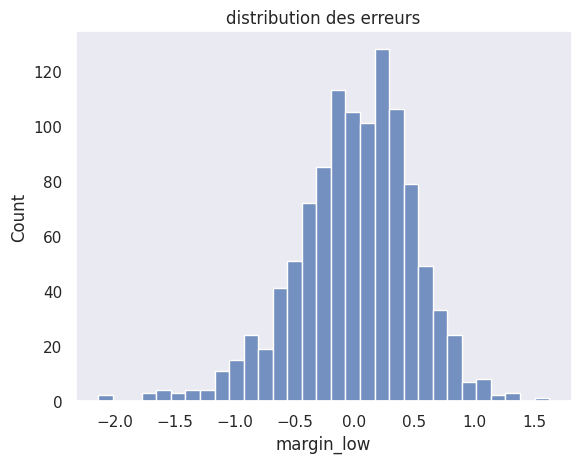


 test de Normalité des erreurs


Interprétation du test:
H0 : La série suit une loi Normale
H1 : La série ne suit pas une loi Normale
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.0 %


                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     839.9
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          1.58e-137
Time:                        15:11:25   Log-Likelihood:                -780.54
No. Observations:                1097   AIC:                             1565.
Df Residuals:                    1095   BIC:                            

LinearRegression()

In [7]:
perso_reg.auto_regression_lineaire(data_linear[['length','margin_low']],'margin_low',intercept=True)

Régression linéaire simple :<br>
Coefficient de détermination très bas. On peut essayer d'avoir mieux<br>
Et d'autres soucis.

In [8]:
liste_colonne = ['is_genuine',
                 'diagonal',
                 'height_left',
                 'height_right',
                 'margin_low',
                 'margin_up',
                 'length'
                ]

intercept (const dans statmodels) -3.245772764801453
Coefficients: 
 [-1.213588    0.01031642  0.00276712  0.04723002 -0.25875826  0.02123901]
Erreur des moindres carrés train : 0.17
Coefficient de determination train : 0.62
erreur max train:  1.474356447418458
score train : 0.6236750185782756
score test : 0.5897599623896639


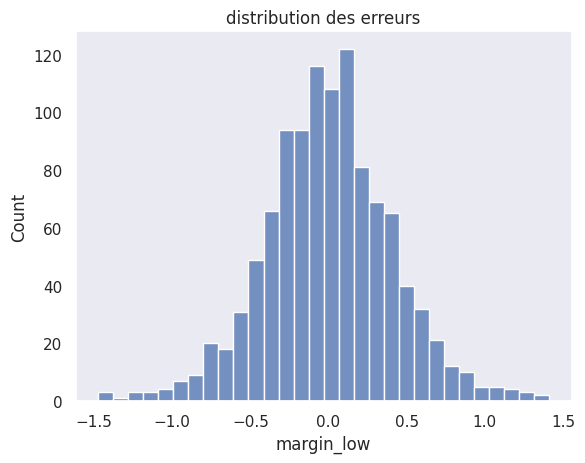


 test de Normalité des erreurs


Interprétation du test:
H0 : La série suit une loi Normale
H1 : La série ne suit pas une loi Normale
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.01 %


                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     301.1
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          2.80e-227
Time:                        15:11:25   Log-Likelihood:                -580.39
No. Observations:                1097   AIC:                             1175.
Df Residuals:                    1090   BIC:                           

In [9]:
regr = perso_reg.auto_regression_lineaire(data_linear[liste_colonne],'margin_low',intercept=True)

régression linéaire multiple:<br>
coefficient de détermination mieux<br>
erreur des moindres carrés plus basse (donc meilleure regression que précédemment)<br>
Des données en trop car non significatives sont présentes.<br>

In [10]:
#après avoir retiré une à une les colonnes inutiles
liste_colonne = ['is_genuine',
                 #'diagonal',
                 #'height_left',
                 #'height_right',
                 'margin_low',
                 'margin_up',
                 #'length'
                ]

intercept (const dans statmodels) 5.9959161450569685
Coefficients: 
 [-1.1552154  -0.23786822]
Erreur des moindres carrés train : 0.17
Coefficient de determination train : 0.61
erreur max train:  1.484291622539219
score train : 0.607024034375945
score test : 0.6426382405704203


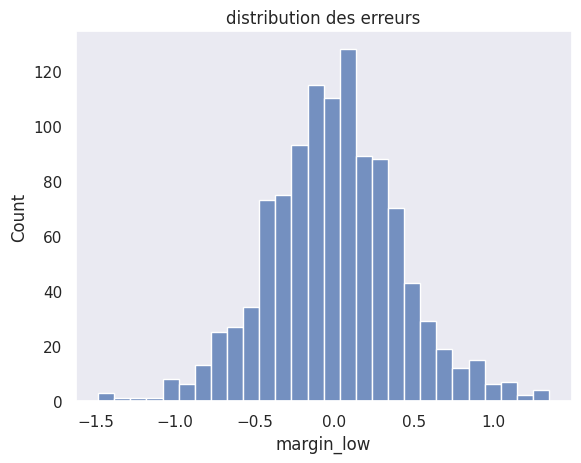


 test de Normalité des erreurs


Interprétation du test:
H0 : La série suit une loi Normale
H1 : La série ne suit pas une loi Normale
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.11 %


                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     844.9
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          1.31e-222
Time:                        15:11:25   Log-Likelihood:                -587.69
No. Observations:                1097   AIC:                             1181.
Df Residuals:                    1094   BIC:                           

In [11]:
regr = perso_reg.auto_regression_lineaire(data_linear[liste_colonne],'margin_low',intercept=True)

régression multiple nettoyée :<br>
erreur des moindre carrés identique, R² identique<br>
La distribution des erreurs est testée par shapiro<br>
La régression est non valide mais, faute de mieux on l'applique.<br>
<br>
On va faire les classements avec un data avec regression linéaire et sans.<br>
On choisira le meilleur des classements<br>

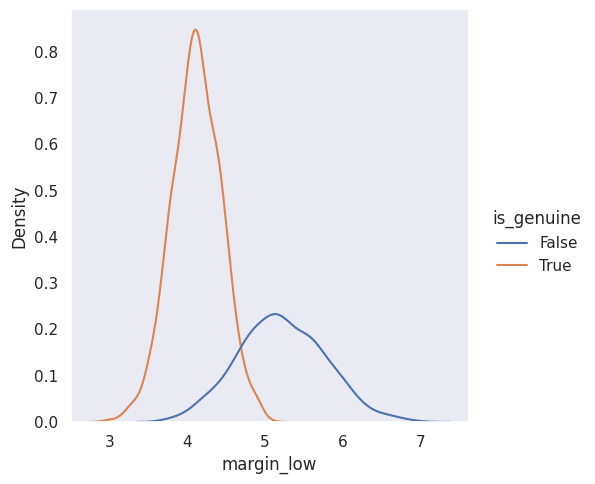

In [12]:
#distribution margin_low
sns.displot(data_billets, x="margin_low",hue='is_genuine', kind="kde")

plt.show()

In [13]:
#application sur le dataset:

#creation du dataset billets nan
data_billets_nan= data_billets.loc[data_billets['margin_low'].isnull()]
#enlever la colonne avec des NAN
data_billets_nan.pop('margin_low')

#appliquer la regression lineaire sur le dataset
#enlever margin low du nom de colonne
liste_colonne.remove('margin_low')

data_billets.loc[
    data_billets['margin_low'].isnull()
    ,['margin_low']] = regr.predict(data_billets_nan[liste_colonne])

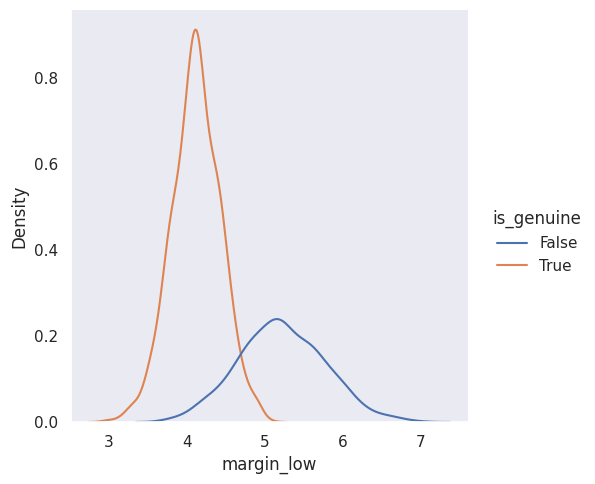

In [14]:
#distribution margin_low
sns.displot(data_billets, x="margin_low",hue='is_genuine', kind="kde")
plt.show()

In [15]:
data_billets[data_billets.isnull().any(axis=1)]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


In [16]:
data_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [17]:
#export des billets avec regression pour utilisation dans un autre dataframe
data_billets.to_csv("donnee_de_base/billets_bonux.csv",index=False)

In [18]:
#faire 2 dataframes 1 data_billet_reg avec regulation un autre avec les valeurs enlevées
data_billets_reg = pd.read_csv("donnee_de_base/billets_bonux.csv")
data_billets = pd.read_csv("donnee_de_base/billets.csv",sep=";")
data_billets = data_billets.dropna()


## Détection des faux billets
<a id=reglogis></a>
### Régression logistique pour trouver les faux billets avec le dataset régression linéaire

[precision et detail de precision et recall](https://kobia.fr/classification-metrics-precision-recall/)<br>
[f1-score](https://kobia.fr/classification-metrics-f1-score/)<br>

In [19]:
liste_colonne = ['is_genuine',
                 #'diagonal',
                 #'height_left',
                 #'height_right',
                 'margin_low',
                 'margin_up',
                 'length'
                ]
#enregistrement de la liste pour les autres notebooks
perso_pandas.ecris_liste(liste = liste_colonne, chemin_fichier = 'model/liste.liste')

rapport sur données d'entrainement :


              precision    recall  f1-score   support

       False       0.99      0.98      0.99       380
        True       0.99      1.00      0.99       745

    accuracy                           0.99      1125
   macro avg       0.99      0.99      0.99      1125
weighted avg       0.99      0.99      0.99      1125



rapport sur données de test:


              precision    recall  f1-score   support

       False       1.00      0.98      0.99       120
        True       0.99      1.00      1.00       255

    accuracy                           0.99       375
   macro avg       1.00      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



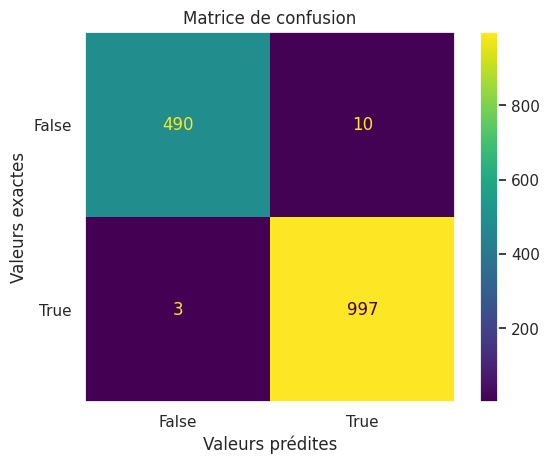

rapport de classification jeu de test
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       500
        True       0.99      1.00      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



['model/reg_log_reg.modele']

In [20]:
model_reg_logis_reg = perso_classement.regression_logistique(data_billets_reg[liste_colonne],'is_genuine')
#sauvegarde du modele
dump(model_reg_logis_reg, 'model/reg_log_reg.modele') 

### Régression logistique pour trouver les faux billets avec le dataset sans régression linéaire

rapport sur données d'entrainement :


              precision    recall  f1-score   support

       False       1.00      0.98      0.99       357
        True       0.99      1.00      0.99       740

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



rapport sur données de test:


              precision    recall  f1-score   support

       False       0.99      0.98      0.98       135
        True       0.99      0.99      0.99       231

    accuracy                           0.99       366
   macro avg       0.99      0.98      0.99       366
weighted avg       0.99      0.99      0.99       366



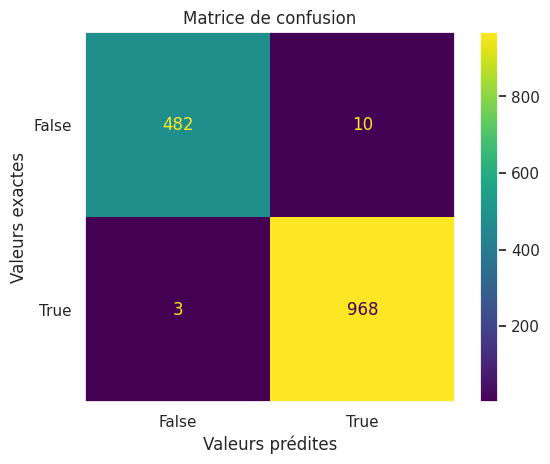

rapport de classification jeu de test
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       492
        True       0.99      1.00      0.99       971

    accuracy                           0.99      1463
   macro avg       0.99      0.99      0.99      1463
weighted avg       0.99      0.99      0.99      1463



['model/reg_log.modele']

In [21]:
model_reg_logis = perso_classement.regression_logistique(data_billets[liste_colonne],'is_genuine')
#sauvegarde du modele
dump(model_reg_logis, 'model/reg_log.modele') 

Avec ou sans la régression, la différence n'est pas flagrante.<br>

<a id=kmean></a>
### Model Kmeans


rapport sur données d'entrainement :


              precision    recall  f1-score   support

       False       0.99      0.95      0.97       380
        True       0.97      1.00      0.99       745

    accuracy                           0.98      1125
   macro avg       0.98      0.97      0.98      1125
weighted avg       0.98      0.98      0.98      1125



rapport sur données de test:


              precision    recall  f1-score   support

       False       0.99      0.93      0.96       120
        True       0.97      1.00      0.98       255

    accuracy                           0.97       375
   macro avg       0.98      0.96      0.97       375
weighted avg       0.97      0.97      0.97       375



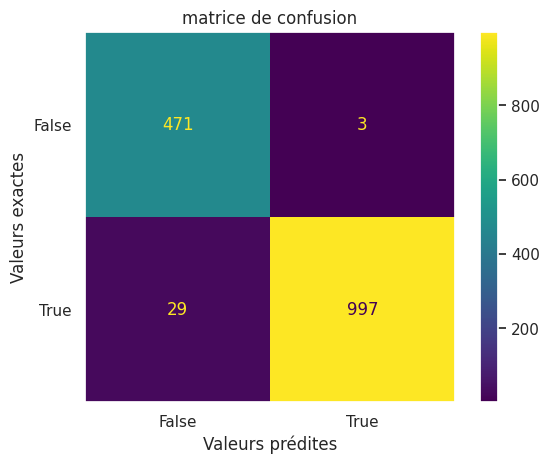

rapport sur données totales
              precision    recall  f1-score   support

       False       0.99      0.94      0.97       500
        True       0.97      1.00      0.98      1000

    accuracy                           0.98      1500
   macro avg       0.98      0.97      0.98      1500
weighted avg       0.98      0.98      0.98      1500



['model/KMeans_reg.modele']

In [22]:
model_KMeans_reg = perso_classement.kmeans_bool(data_billets_reg[liste_colonne],'is_genuine')
#sauvegarde du modele
dump(model_KMeans_reg, 'model/KMeans_reg.modele')

rapport sur données d'entrainement :


              precision    recall  f1-score   support

       False       0.99      0.95      0.97       387
        True       0.97      1.00      0.98       710

    accuracy                           0.98      1097
   macro avg       0.98      0.97      0.98      1097
weighted avg       0.98      0.98      0.98      1097



rapport sur données de test:


              precision    recall  f1-score   support

       False       1.00      0.94      0.97       105
        True       0.98      1.00      0.99       261

    accuracy                           0.98       366
   macro avg       0.99      0.97      0.98       366
weighted avg       0.98      0.98      0.98       366



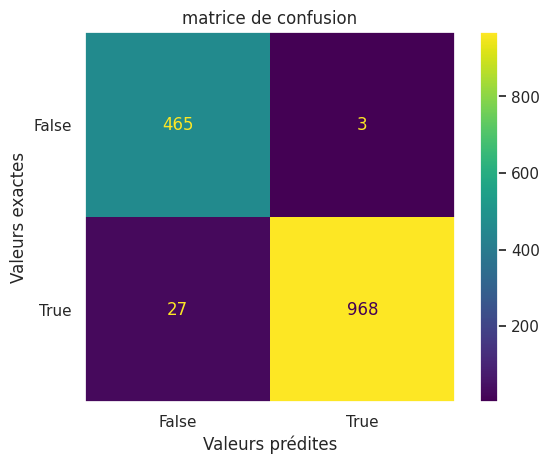

rapport sur données totales
              precision    recall  f1-score   support

       False       0.99      0.95      0.97       492
        True       0.97      1.00      0.98       971

    accuracy                           0.98      1463
   macro avg       0.98      0.97      0.98      1463
weighted avg       0.98      0.98      0.98      1463



['model/KMeans.modele']

In [23]:
model_KMeans = perso_classement.kmeans_bool(data_billets[liste_colonne],'is_genuine')
#sauvegarde du modele
dump(model_KMeans, 'model/KMeans.modele') 

Là aussi la différence entre les datasets avec ou sans régression n'est pas flagrante.

<a id=predic_logis></a>
### Application des prédictions
#### avec le modele de regression logistique

In [24]:
liste_colonne.remove('is_genuine')

In [25]:
#sur le fichier production livré
data_billets_test_exemple['predic Reg_logis']= model_reg_logis.predict(data_billets_test_exemple[liste_colonne])

In [26]:
display(data_billets_test_exemple)

,diagonal,height_left,height_right,margin_low,margin_up,length,predic Reg_logis
id,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True


<a id=predic_Kmeans></a>
#### avec le modele Kmeans

In [27]:
#enlever les predictions reg_logis
predic_prod_reg_logis = data_billets_test_exemple.pop('predic Reg_logis')

In [28]:
data_billets_test_exemple['predic Kmeans']= model_KMeans.predict(data_billets_test_exemple[liste_colonne])
data_billets_test_exemple['predic Kmeans'] = data_billets_test_exemple['predic Kmeans'].astype('bool')

In [29]:
display(data_billets_test_exemple)

,diagonal,height_left,height_right,margin_low,margin_up,length,predic Kmeans
id,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True


In [30]:
#help perso
help(perso_classement)

Help on module fonctions.perso_classement in fonctions:

NAME
    fonctions.perso_classement

FUNCTIONS
    KNNtest(data, colonne_cible, kmin=1, kmax=10)
        renvoie un modele KNN
        arg: data , dataframe a analyser
            colonne_cible : nom de la colonnne cible
        returns:
            courbe apprentissage : dataframe avec les scores train et test
    
    dentogramme(df, methode='ward', nb_branche=10, taille=(12, 8), nom_colonne_cluster='cluster')
        Dessine un dentogramme et rajoute un colonne avec les cluster trouvés.
        SRC : https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5177936-effectuez-une-classification-hierarchique
        parameter :
            df: dataframe à analyser
            methode : methode voulue default WARD
            nb_branche : nombre de branche à afficher
            nom_colonne_cluster : nom de la colonne default 'cluster'
            taille : taille du graphe en pouce
    
    determ

In [31]:
help(perso_reg)

Help on module fonctions.perso_reg_lin in fonctions:

NAME
    fonctions.perso_reg_lin

FUNCTIONS
    auto_regression_lineaire(data, colonne_cible, intercept=True)
        crée un modele de regression lineaire
        arg:
            data : dataframe de donnée
            colonne_cible: string nom de la colonne cible
        return:
            regr : modele sklearn de regression lineaire
    
    regression_lineaire(data_train, data_test, target_train, target_test, intercept=True)
        crée un modele de regression lineaire.
        arg :
            train : dataframe ou serie ou array données d entrainement         
            target dataframe ou serie ou array         
            
        return :
            regr : model sklearn de regression lineaire

FILE
    /home/barrios/Parcours_Data/projet_10/fonctions/perso_reg_lin.py


